In [5]:
import pandas as pd
import os

In [2]:
#pd.read_feather('combt.feather').set_index('trade_date').cumsum().plot()

In [3]:
path = './temp/portfolio/Timing'

In [84]:
top_res = []
opt_res = []
out_res = []
for root, dirs, files in os.walk(path):
    for file in files:
        #print(root)
        if 'pnl' in file:
            #print(file)
            horizon = root.split('/')[-2]
            catpe = root.split('/')[-1]
            #print(catpe)
            if file == 'pnl1.fea':
                pnl = pd.read_feather(os.path.join(root, file))
                pnl = pnl.set_index('trade_date')
                pnl.name = "{0}h_close".format(horizon)
                pnl = pnl.rename(columns={'pnl':"{0}h_close".format(horizon)})
                if catpe == 'opt':
                    opt_res.append(pnl)
                elif catpe == 'top':
                    top_res.append(pnl)

            elif file == 'pnl2.fea':
                pnl = pd.read_feather(os.path.join(root, file))
                pnl = pnl.set_index('trade_date')
                pnl.name = "{0}h_open".format(horizon)
                pnl = pnl.rename(columns={'pnl':"{0}h_open".format(horizon)})
                if catpe == 'opt':
                    opt_res.append(pnl)
                elif catpe == 'top':
                    top_res.append(pnl)
            
        elif 'out' in file:
            if file == 'out1.fea':
                print(file)
                out = pd.read_feather(os.path.join(root, file)).set_index('name')
                out = out.T
                name = "{0}h_{1}_close".format(horizon,catpe)
                out['name'] = name
                out_res.append(out)
            elif file == 'out2.fea':
                print(file)
                out = pd.read_feather(os.path.join(root, file)).set_index('name')
                out = out.T
                name = "{0}h_{1}_open".format(horizon,catpe)
                out['name'] = name
                out_res.append(out)


out1.fea
out2.fea
out1.fea
out2.fea
out1.fea
out2.fea
out1.fea
out2.fea
out1.fea
out2.fea
out1.fea
out2.fea


<Axes: xlabel='trade_date'>

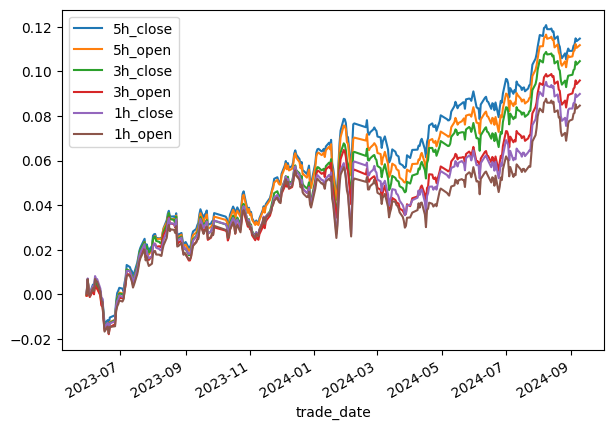

In [39]:
pd.concat(top_res,axis=1).cumsum().plot(figsize=(7,5))


<Axes: xlabel='trade_date'>

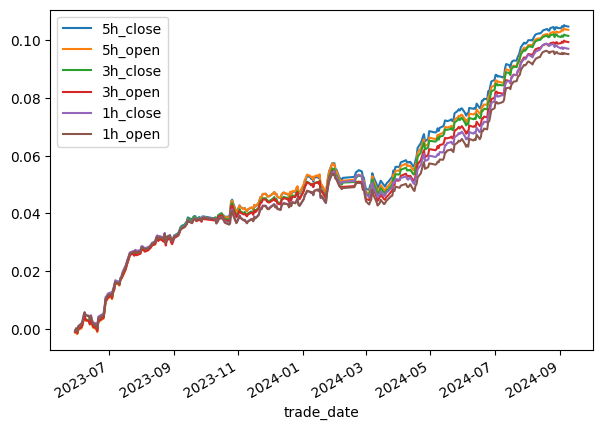

In [40]:
pd.concat(opt_res,axis=1).cumsum().plot(figsize=(7,5))


In [88]:
pd.concat(out_res,axis=0)[['name','ret','std','sharpe','turnover','maxdd','calmar']].sort_values(by='name',ascending=True)

name,name,ret,std,sharpe,turnover,maxdd,calmar
value,1h_opt_close,0.077940,0.017402,4.478718,0.018495,0.009056,8.606230
value,1h_opt_open,0.076448,0.017472,4.375319,0.019178,0.011071,6.905413
value,1h_top_close,0.072137,0.056287,1.281588,0.048111,0.031767,2.270833
value,1h_top_open,0.067951,0.054626,1.243926,0.049451,0.031093,2.185442
value,3h_opt_close,0.081526,0.017990,4.531861,0.015573,0.009281,8.784547
value,3h_opt_open,0.079799,0.018022,4.427795,0.016341,0.010453,7.634100
value,3h_top_close,0.083954,0.050787,1.653065,0.036317,0.024438,3.435324
value,3h_top_open,0.076995,0.050181,1.534339,0.037659,0.029202,2.636667
value,5h_opt_close,0.084121,0.018132,4.639240,0.014507,0.009252,9.091841
value,5h_opt_open,0.083217,0.018148,4.585435,0.015303,0.010197,8.161035


In [57]:
out_res[0]

name,ret,std,sharpe,turnover,maxdd,calmar,name
value,0.089707,0.050514,1.775903,0.033694,0.025643,3.498369,5h_top_open


In [73]:
S1 = pd.read_feather(os.path.join(root, file)).set_index('name').T

In [74]:
#S1.columns.name=None

In [77]:
S1.reset_index()[['ret','std','sharpe']]

name,ret,std,sharpe
0,0.076448,0.017472,4.375319
